In [1]:
import time
from selenium import webdriver
customOptions = webdriver.ChromeOptions()

In [2]:
from selenium.webdriver.common.keys import Keys

In [3]:
#driver = webdriver.Chrome('chromedriver',options=customOptions)


In [4]:
driver = webdriver.Chrome('chromedriver',options=customOptions)
URL='https://www.amazon.in/Redmi-Note-Pro-Storage-Processor/product-reviews/B07X4PKGSN/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=one_star'
driver.get(URL)

In [9]:
WebPage_Element=driver.find_element_by_partial_link_text('See all 6,009 critical reviews')
WebPage_Element.click()


In [11]:
#WebPage_Element.click()


In [11]:
TextBody = driver.find_element_by_css_selector('body')


In [12]:
TextBody.send_keys(Keys.CONTROL+'a')

In [13]:
import re
RawFullText=TextBody.text
CleanText=re.sub('\n',' ',RawFullText)
CleanText = re.sub(r'[^a-z A-Z]',r'',CleanText)

In [14]:
CleanText


'Skip to main content in All All Categories Deals Alexa Skills Amazon Devices Amazon Fashion Amazon Pantry Appliances Apps  Games Baby Beauty Books Car  Motorbike Clothing  Accessories Collectibles Computers  Accessories Electronics Furniture Garden  Outdoors Gift Cards Grocery  Gourmet Foods Health  Personal Care Home  Kitchen Industrial  Scientific Jewellery Kindle Store Luggage  Bags Luxury Beauty Movies  TV Shows Music Musical Instruments Office Products Pet Supplies Prime Video Shoes  Handbags Software Sports Fitness  Outdoors Tools  Home Improvement Toys  Games Under  Video Games Watches Hello Sign in Account  Lists Returns  Orders Try Prime  Cart Hello Select your address Mobiles Best Sellers Todays Deals New Releases Computers Customer Service Amazon Pay Redmi Note  Pro Halo White GB RAM GB Storage with Helio GT  Customer reviews Customer reviews  out of   global ratings  star   star   star   star   star  Redmi Note  Pro Halo White GB RAM GB Storage with Helio GT Processor byRe

In [15]:
from textblob import TextBlob
SampleTextInBlobFormat = TextBlob(CleanText)

In [16]:
SampleTextInBlobFormat.sentiment

Sentiment(polarity=0.02745964316057774, subjectivity=0.46873123760974245)

In [17]:
NounPhrases=SampleTextInBlobFormat.noun_phrases
NounPhrases

WordList(['skip', 'main content', 'categories deals alexa skills amazon devices amazon', 'amazon pantry appliances apps', 'baby', 'beauty books', 'car motorbike clothing accessories collectibles computers accessories electronics furniture', 'outdoors', 'gourmet', 'personal care', 'kitchen', 'scientific jewellery kindle store luggage bags luxury', 'movies', 'shows', 'musical instruments', 'products pet supplies prime video shoes handbags software', 'fitness outdoors tools', 'improvement', 'video', 'watches hello sign', 'account lists returns orders try prime cart hello select', 'mobiles', 'sellers todays deals', 'releases computers customer', 'amazon pay redmi', 'pro halo', 'gb ram gb storage', 'helio gt customer', 'customer', 'global ratings star star star star star', 'redmi', 'pro halo', 'gb ram gb storage', 'helio gt processor', 'buying options', 'list top', 'positive review', 'positive reviews', 'mohammed abdul rahman', 'beast reviewed', 'india', 'november', 'divided', 'pros finger'

In [18]:
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))

NewNounList

['skip',
 'main_content',
 'categories_deals_alexa_skills_amazon_devices_amazon',
 'amazon_pantry_appliances_apps',
 'baby',
 'beauty_books',
 'car_motorbike_clothing_accessories_collectibles_computers_accessories_electronics_furniture',
 'outdoors',
 'gourmet',
 'personal_care',
 'kitchen',
 'scientific_jewellery_kindle_store_luggage_bags_luxury',
 'movies',
 'shows',
 'musical_instruments',
 'products_pet_supplies_prime_video_shoes_handbags_software',
 'fitness_outdoors_tools',
 'improvement',
 'video',
 'watches_hello_sign',
 'account_lists_returns_orders_try_prime_cart_hello_select',
 'mobiles',
 'sellers_todays_deals',
 'releases_computers_customer',
 'amazon_pay_redmi',
 'pro_halo',
 'gb_ram_gb_storage',
 'helio_gt_customer',
 'customer',
 'global_ratings_star_star_star_star_star',
 'redmi',
 'pro_halo',
 'gb_ram_gb_storage',
 'helio_gt_processor',
 'buying_options',
 'list_top',
 'positive_review',
 'positive_reviews',
 'mohammed_abdul_rahman',
 'beast_reviewed',
 'india',
 'nov

In [19]:
import nltk

In [20]:
sampleSentence = nltk.word_tokenize(CleanText)
sampleSentencePOS = nltk.pos_tag(sampleSentence)
OnlyAdjectives= (" ").join([POStags[0] for POStags in sampleSentencePOS if POStags[1] in ['JJ','JJR','JJS']])
print ('Adjectives: ', OnlyAdjectives)
print('Overall sentiment score of ajdectives: ',TextBlob(OnlyAdjectives).sentiment)

Adjectives:  main global positive positive less super smooth upto available awesome internal super awesome plastic poor other good heavy left less helpful critical critical praveen helpful Most recent Top positive critical text text video starClear global global praveen helpful poor difficult helpful bad real helpful pankaj clear helpful kamal many signal weak side big old u plz helpful mobile green cheap better black average overall bad helpful disappointed old helpful worth redmi pro better redmi note pro helpful promextiry doesnt properly helpful wont nd technician replaced doest helpful fast featured easy interested Everyday
Overall sentiment score of ajdectives:  Sentiment(polarity=0.0845862470862471, subjectivity=0.4542249417249418)


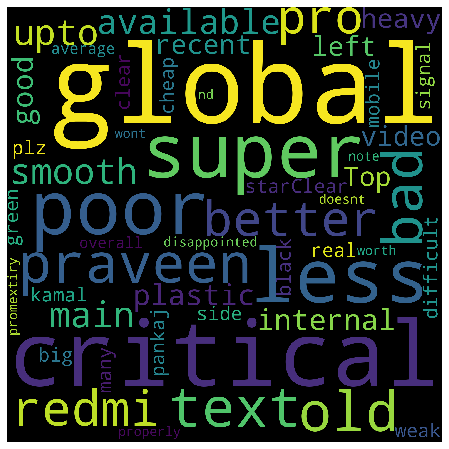

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

customStopwords=list(STOPWORDS) + ['awesome','happy','positive','helpful','professional']
wordcloudimage = WordCloud(max_words=50,
                           font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords + ['nlp'],
                            width=2000,
                            height=2000
                          ).generate(OnlyAdjectives)

plt.figure(figsize=(8,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()